In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
import copy
n=5
nn=5
divide_number=1000;
object_number=1.0
batch_size=128
width=0.0001
width1=0.0001

In [2]:
def distribution1(i):
    x=0;
    #x=np.random.uniform(0, 1, size=1);
    #R=np.random.randint(2);
    if (i==0):
        x=np.random.normal(0.1, 0.1, size=1);
    elif(i==1):
        x=np.random.normal(0.2, 0.1, size=1);
    elif(i==2):
        x=np.random.normal(0.3, 0.1, size=1);
    elif(i==3):
        x=np.random.normal(0.4, 0.1, size=1);
    else:
        x=np.random.normal(0.5, 0.1, size=1);
    if(x<=0):
        x=0;
    return x;

def distribution():
    list_temp=np.random.rand(nn);
    for ii in range(len(list_temp)):
        list_temp[ii]=distribution1(ii)
    list_temp=np.array(list_temp)
    #list_temp=sorted(list_temp,reverse=1);
    return list_temp;
print(distribution())

[0.16727427 0.02559395 0.29634793 0.44950317 0.72236557]


In [3]:
possible = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    for i in range(100000):#100000
        x=distribution1(j%5)*divide_number
        temp=int(x)
        #print(o,temp)
        if(temp>divide_number):
            temp=divide_number
        possible[j][temp]+=1/100000;

In [4]:
P = np.zeros((n,divide_number+1), dtype=np.double)
for j in range(0,n):
    P[j][0]=possible[j][0]
    for i in range(1,divide_number+1):
        P[j][i]=P[j][i-1]+possible[j][i];
print(P)

[[1.5970e-01 1.6178e-01 1.6428e-01 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.2670e-02 2.3160e-02 2.3740e-02 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.2200e-03 1.3000e-03 1.3800e-03 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.0000e-05 2.0000e-05 2.0000e-05 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 1.0000e+00 1.0000e+00]]


In [5]:
dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
record_dp = np.zeros(((nn+2), (nn+2), divide_number+1), dtype=np.double)
for yes in range(0,nn+1):
    for i in range(0,divide_number+1):
        dp[1][yes][i]=(1.0-P[nn-1][i])*(0.0)+P[nn-1][i]*(yes+1.0);
        record_dp[1][yes][i]=i;

In [6]:
for i in range(2,nn+1):
    for yes in range(0,nn+1):
        for j in range(divide_number+1):
            min_num=99999;
            for o in range(0,j+1):
                if( min_num>(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(dp[i-1][yes][j]+1)):
                    record_dp[i][yes][j]=o;
                    min_num=(1.0-P[nn-i][o])*dp[i-1][yes+1][j-o]+P[nn-i][o]*(dp[i-1][yes][j]+1)
                #min_num=min(min_num,(1.0-P[o])*dp[i-1][yes+1][j-o]+
                #            P[o]*(dp[i-1][yes][j]+1));
                
                #print(i,yes,j,o,(divide_number-o)/divide_number*dp[i-1][yes+1][j-o]+
                #            (o)/divide_number*(dp[i-1][yes][j]+1));
            dp[i][yes][j]=min_num;
        dp[i][yes][0]=0;
        record_dp[i][yes][0]=0

In [7]:
print(dp[nn][0][divide_number]);
print(record_dp[nn][0][divide_number]);
print(temp)


1.8903822995975958
66.0
621


In [8]:
def plan_dp(temp):
    #print(temp)
    remain=divide_number
    yes=0;
    ans =0;
    o_list=[];
    remain_list=[];
    for i in range(nn,0,-1):
        o=record_dp[i][yes][remain]
        #print(o,remain)
        o_list.append(o)
        remain_list.append(remain);
        if(o<temp[nn-i]):
            remain-=int(o);
            
            yes+=1;
        elif (remain>0):
            ans+=1;
    if(remain<=0):
        return ans,o_list;
    else:
        return nn,o_list;
    

In [9]:
ans_list=[];
for i in range(10000):
    temp=distribution()*divide_number   
    ans_list.append(plan_dp(temp)[0]);
    #print(plan_dp(temp)[0])
print(sum(ans_list)/len(ans_list))

1.8335


In [10]:
#Cost Sharing
def cost_sharing(test):
    kk=100;
    total_delay1=0;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k):
            total_delay1+=delay;
            break;
        if(k<=1):
            #print(test);
            total_delay1+=nn;
    return total_delay1;

def cost_sharing_label(test):
    kk=100;
    total_delay1=0;
    temp=[]
    for item in test:
        if(item!=-1):
            temp.append(item);
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k-1):
            return 1.0/k
            break;


total_delay_cost=0;
test_number_cost=10000
for i in range(test_number_cost):
    test=distribution();
    kk=100;
    for k in range(nn,0,-1):
        count=0;
        delay=0;
        for item in test:
            if(item>=1.0/k):
                count+=1;
            else:
                delay+=1;
        if(count>=k):
            total_delay_cost+=delay;
            break;
        if(k<=1):
            #print(test);
            total_delay_cost+=nn;
            

print(total_delay_cost/test_number_cost);
    

3.2834


In [11]:
#print(trainingdata)

import tensorflow as tf
#导入TensorFlow工具包并简称为tf
 
from numpy.random import RandomState
#导入numpy工具包，生成模拟数据集
keep_prob=1
tensor_number=200
w1 = tf.Variable(tf.truncated_normal([n,tensor_number],stddev=0.1))
w2 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w3 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w4 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w5 = tf.Variable(tf.truncated_normal([tensor_number,tensor_number],stddev=0.1))
w6 = tf.Variable(tf.truncated_normal([tensor_number,n],stddev=0.1))


biases1 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases2 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases3 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases4 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases5 = tf.Variable(tf.zeros([1,tensor_number])+0.01)
biases6 = tf.Variable(tf.zeros([1,n])+0.01)




lr1 = tf.Variable(0.00000001,dtype=tf.float32)
lr2 = tf.Variable(0.0000001,dtype=tf.float32)
#分别定义一二层和二三层之间的网络参数，标准差为1，随机产生的数保持一致

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32,shape=(None,n),name='x-input1')
    xx = tf.placeholder(tf.float32,shape=(None,n),name='x-input2')
    y = tf.placeholder(tf.float32,shape=(None,n),name='y-input1')

    

#定义神经网络前向传播过程


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
#输入为两个维度，即两个特征，输出为一个标签,声明数据类型float32，None即一个batch大小
#y_是真实的标签

xor0=tf.sigmoid((1e3-x) / 0.00001)

x1_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor0,w1))+biases1,keep_prob)
x1_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_1,w2))+biases2,keep_prob)
x1_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_2,w3))+biases3,keep_prob)
x1_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_3,w4))+biases4,keep_prob)
x1_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x1_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y1_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x1_5,w6))+biases6))
xor1 = tf.sigmoid((x+0.001-y1_1) / width)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
x2_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor1,w1))+biases1,keep_prob)
x2_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_1,w2))+biases2,keep_prob)
x2_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_2,w3))+biases3,keep_prob)
x2_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_3,w4))+biases4,keep_prob)
x2_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x2_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y2_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x2_5,w6))+biases6)-(1.0-xor1)*1000)
xor2 = tf.sigmoid((x+0.001-y2_1) / width) * xor1

In [14]:
x3_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor2,w1))+biases1,keep_prob)
x3_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_1,w2))+biases2,keep_prob)
x3_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_2,w3))+biases3,keep_prob)
x3_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_3,w4))+biases4,keep_prob)
x3_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x3_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y3_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x3_5,w6))+biases6)-(1.0-xor2)*1000)
xor3 = tf.sigmoid((x+0.001-y3_1) / width) * xor2

In [15]:
x4_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor3,w1))+biases1,keep_prob)
x4_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_1,w2))+biases2,keep_prob)
x4_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_2,w3))+biases3,keep_prob)
x4_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_3,w4))+biases4,keep_prob)
x4_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x4_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y4_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x4_5,w6))+biases6)-(1.0-xor3)*1000)
xor4 = tf.sigmoid((x+0.001-y4_1) / width) * xor3

In [16]:
x5_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xor4,w1))+biases1,keep_prob)
x5_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_1,w2))+biases2,keep_prob)
x5_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_2,w3))+biases3,keep_prob)
x5_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_3,w4))+biases4,keep_prob)
x5_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x5_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y5_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x5_5,w6))+biases6)-(1.0-xor4)*1000)
xor5 = tf.sigmoid((x+0.001-y5_1) / width) * xor4

In [17]:


x0_1 = tf.nn.dropout(tf.nn.relu(tf.matmul(xx,w1))+biases1,keep_prob)
x0_2 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_1,w2))+biases2,keep_prob)
x0_3 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_2,w3))+biases3,keep_prob)
x0_4 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_3,w4))+biases4,keep_prob)
x0_5 = tf.nn.dropout(tf.nn.relu(tf.matmul(x0_4,w5))+biases5,keep_prob)
#y1_1  = tf.nn.l2_normalize(tf.nn.dropout(tf.nn.relu(tf.matmul(x1_5,w61)+biases61),keep_prob))
y0_1 = tf.nn.softmax((tf.nn.relu(tf.matmul(x0_5,w6))+biases6))


In [18]:
offer= y5_1 * xor5

In [19]:
possible=1.0-offer
delay = tf.reduce_sum(offer,reduction_indices=1)

In [20]:

output_payment = tf.reduce_sum(offer,reduction_indices=1)
delta = tf.sigmoid((output_payment+0.001-1.0) / width1)
tf_delay = delta * tf.reduce_sum((1.0-xor5),reduction_indices=1) + (1.0 - delta) * n;


In [21]:
#定义损失函数和反向传播算法

loss= 1.0*(tf.reduce_sum(tf_delay))
#loss= tf.reduce_sum(x5_1)
loss_dp1=tf.reduce_sum((y*xx),reduction_indices=1)
loss_dp2=tf.where(tf.greater_equal(loss_dp1,0.99),y0_1-y*xx,y0_1-y0_1);
loss_dp= 1.0*(tf.reduce_sum(tf.square(loss_dp2)))

train_step1=tf.train.AdamOptimizer(lr1).minimize(loss)
train_step2=tf.train.GradientDescentOptimizer(lr2).minimize(loss)
train_step3=tf.train.AdadeltaOptimizer(lr1).minimize(loss)
train_step4=tf.train.AdamOptimizer(lr1).minimize(loss_dp)
#train_step4=tf.train.AdagradDAOptimizer(lr2).minimize(loss)
print(loss)

Instructions for updating:
Use tf.cast instead.
Tensor("mul_11:0", shape=(), dtype=float32)


In [22]:
saver = tf.train.Saver()
#创建会话来运行TensorFlow程序
sess = tf.Session()

init_op = tf.global_variables_initializer()
sess.run(init_op)
writer=tf.summary.FileWriter('logs/',sess.graph)

In [23]:

def run_appen(list_x):
    x1=list_x[0];
    x2=list_x[1];
    x3=list_x[2];
    x4=list_x[3];
    x5=list_x[4];
    ans,S=plan_dp([x1*divide_number,x2*divide_number,x3*divide_number,
                  x4*divide_number,x5*divide_number]);
    #print(S[0]/divide_number)
    SS=copy.deepcopy(S);
    if(x1>=S[0]/divide_number):
        SS[0]=1;
    else:
        SS[0]=0;
    if(x2>=S[1]/divide_number):
        SS[1]=1;
    else:
        SS[1]=0;
    if(x3>=S[2]/divide_number):
        SS[2]=1;
    else:
        SS[2]=0;
    if(x4>=S[3]/divide_number):
        SS[3]=1;
    else:
        SS[3]=0;
    if(x5>=S[4]/divide_number):
        SS[4]=1;
    else:
        SS[4]=0;
    trainingdata1.append(SS)
    trainingdata.append(list_x)
    #traininglabel1.append([cost_sharing_label(test)])
    traininglabel.append([S[0]/divide_number,
                          S[1]/divide_number,S[2]/divide_number,S[3]/divide_number,S[4]/divide_number])
def readdata():
    for i in range(50000):#50000):
        list_x=distribution();
        newX.append(list_x)
    for i in range(len(newX)):
        run_appen(newX[i]);
        
                            
newX=[];
trainingdata1=[];
trainingdata=[];
traininglabel=[];
def produce_training_data():
    newX=[];
    trainingdata=[];
    S=1.0
    readdata();

produce_training_data();
np.set_printoptions(precision=4, suppress=True)

In [24]:
print(traininglabel);

[[0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.193, 0.353, 0.452], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.139, 0.205, 0.28, 0.376], [0.066, 0.139, 0.205, 0.28, 0.376], [0.066, 0.139, 0.205, 0.381, 0.48], [0.066, 0.139, 0.241, 0.332, 0.427], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.193, 0.257, 0.612], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.228, 0.303, 0.706], [0.066, 0.139, 0.241, 0.452, 0.548], [0.066, 0.129, 0.228, 0.303, 0.403], [0.066, 0.139, 0.205, 0.381, 0.48], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.228, 0.303, 0.403], [0.066, 0.129, 0.228, 0.303, 0.403], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.139, 0.205, 0.28, 0.376], [0.066, 0.139, 0.241, 0.452, 1.0], [0.066, 0.129, 0.228, 0.303, 0.403], [0.066, 0.139, 0.205, 0.28, 0.376], [0.066, 0.129, 0.228, 0.303, 0.403], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.129, 0.193, 0.257, 0.355], [0.066, 0.139, 0.205, 0.28, 0.376], [0.066, 0

In [25]:
print(trainingdata1);

[[1, 1, 1, 1, 1], [1, 1, 0, 1, 1], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 0, 1, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 1], [1, 1, 1, 0, 0], [1, 1, 1, 1, 1], [1, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 0, 0, 0], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 0, 0], [1, 0, 1, 1, 1], [1, 0, 1, 0, 0], [0, 0, 0, 1, 0], [1, 1, 0, 1, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 0, 1, 0], [1, 0, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 0], [1, 1, 0, 0, 0], [0, 1, 0, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 

In [26]:

dataset_size=len(trainingdata)
j1=1
j2=2
print(trainingdata[j1:j2])
print(sess.run(loss,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(x,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(xor2,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


[array([0.1366, 0.1976, 0.1767, 0.4303, 0.5425])]
5.0
[[0.1366 0.1976 0.1767 0.4303 0.5425]]
[[0. 0. 0. 1. 1.]]
[[0. 0. 0. 0. 0.]]


In [27]:
print(sess.run(y1_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

print(sess.run(y2_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(y3_1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )


print(sess.run(xor1,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )

print(sess.run(xor2,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print(sess.run(offer,feed_dict={
    x:trainingdata[j1:j2]
}
              )
     )
print("x:  ",trainingdata[j1:j2])
print("y:  ",traininglabel[j1:j2])
print("xx: ",trainingdata1[j1:j2])
print(sess.run(loss_dp1,feed_dict={
    x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]
}
              )
     )
print(sess.run(loss_dp2,feed_dict={
    x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]
}
              )
     )

print(sess.run(loss_dp,feed_dict={
    x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]
}
              )
     )

[[0.1955 0.1955 0.1955 0.1955 0.2182]]
[[0.     0.3195 0.     0.3195 0.361 ]]
[[0.     0.     0.     0.4785 0.5215]]
[[0. 1. 0. 1. 1.]]
[[0. 0. 0. 1. 1.]]
[[0. 0. 0. 0. 0.]]
x:   [array([0.1366, 0.1976, 0.1767, 0.4303, 0.5425])]
y:   [[0.066, 0.129, 0.193, 0.353, 0.452]]
xx:  [[1, 1, 0, 1, 1]]
[1.]
[[ 0.1301  0.0671  0.1961 -0.1569 -0.2364]]
0.14039014


In [28]:
save_path = saver.restore(sess, "Tensorflow-new-5-difference2/3.ckpt")
STEPS = 10001
#设置训练的轮数
flag=0;
training=1;
for i in range(STEPS):

    	#通过选取的样本训练神经网络并更新参数
    if i%1000 == 0:
        sess.run(tf.assign(lr1,0.000001*(0.99**(i/1000))))
        sess.run(tf.assign(lr2,0.000001*(0.99**(i/1000))))
        loss_value=0;
        if i%1000 == 0:
            ii=10;
            j1=(ii-1)*batch_size
            j2=ii*batch_size
            loss_value += sess.run(loss,feed_dict={x:trainingdata[j1:j2]})
            print("After %d training step(s),loss on data is %g" % (i,loss_value/(j2-j1)))
            print("After %d training step(s),loss_dp on data is %g" % (i,sess.run(loss_dp,feed_dict={x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]})/(j2-j1)))
    if i%10000 == -100:
        if((i/100)%3==0):
            flag=0
        elif((i/100)%3==1):
            flag=1
        else:
            flag=1#flag=2

    randomi = random.randint(0,200000);
    start = (randomi) % dataset_size
    end = min(start+batch_size,dataset_size)
    if(flag==0):
        #sess.run(train_step4,feed_dict={x:trainingdata[j1:j2],xx:trainingdata1[j1:j2],y:traininglabel[j1:j2]})                                                                                                                
        sess.run(train_step1,feed_dict={x:trainingdata[j1:j2]})
    elif(flag==1):
        sess.run(train_step2,feed_dict={
                x:trainingdata[j1:j2]
        })
    else:
        sess.run(train_step3,feed_dict={
                x:trainingdata[j1:j2]
        })

    

save_path = saver.save(sess, "Tensorflow-new-5-difference2/4.ckpt")

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from Tensorflow-new-5-difference2/3.ckpt
After 0 training step(s),loss on data is 2.2583
After 0 training step(s),loss_dp on data is 0.00320175
After 1000 training step(s),loss on data is 2.14076
After 1000 training step(s),loss_dp on data is 0.00381068
After 2000 training step(s),loss on data is 2.14076
After 2000 training step(s),loss_dp on data is 0.00381067
After 3000 training step(s),loss on data is 2.14076
After 3000 training step(s),loss_dp on data is 0.00381068
After 4000 training step(s),loss on data is 2.14076
After 4000 training step(s),loss_dp on data is 0.00381069
After 5000 training step(s),loss on data is 2.14076
After 5000 training step(s),loss_dp on data is 0.00381071
After 6000 training step(s),loss on data is 2.14076
After 6000 training step(s),loss_dp on data is 0.00381077
After 7000 training step(s),loss on data is 2.14076
After 7000 training 

In [29]:
fig = plt.figure()
batch_size = 1

<Figure size 432x288 with 0 Axes>

In [30]:
global list_payment
list_payment=[];
def judgement(list_x):
    delay=sess.run(tf_delay,feed_dict={
                                       x:[list_x]
                                      })
    ans = sess.run(output_payment,feed_dict={
                                       x:[list_x]
                                      })
    #print(delay,ans)
    list_payment.append(ans);
    return delay
def judgement_detail(list_x):
    global list_payment
    offerxor1= sess.run(xor1,feed_dict={
                                      x:[list_x]
                                      })
    offerxor2= sess.run(xor2,feed_dict={
                                      x:[list_x]
                                      })
    offerxor3= sess.run(xor3,feed_dict={
                                      x:[list_x]
                                      })
    offerxor4= sess.run(xor4,feed_dict={
                                      x:[list_x]
                                      })
    offerxor5= sess.run(xor5,feed_dict={
                                      x:[list_x]
                                      })
    Y1= sess.run(y1_1,feed_dict={
                                      x:[list_x]
                                      })
    Y2= sess.run(y2_1,feed_dict={
                                      x:[list_x]
                                      })
    Y3= sess.run(y3_1,feed_dict={
                                      x:[list_x]
                                      })
    Y4= sess.run(y4_1,feed_dict={
                                      x:[list_x]
                                      })
    Y5= sess.run(y5_1,feed_dict={
                                      x:[list_x]
                                      })
    offer_= sess.run(offer,feed_dict={
                                      x:[list_x]
                                      })
    payment=sess.run(output_payment,feed_dict={
                                      x:[list_x]
                                      })

    delay=sess.run(tf_delay,feed_dict={
                                      x:[list_x]
                                      })
    np.set_printoptions(precision=4, suppress=True)
    print('bid:            ',list_x)
    print('Y1:             ',Y1[0])
    print('xor1:           ',offerxor1[0])
    print('Y2:             ',Y2[0])
    print('xor2:           ',offerxor2[0])
    print('Y3:             ',Y3[0])
    print('xor3:           ',offerxor3[0])
    print('Y4:             ',Y4[0])
    print('xor4:           ',offerxor4[0])
    print('Y5:             ',Y5[0])
    print('xor5:           ',offerxor5[0])
    print('offer:          ',offer_[0])
    print('payment:        ',payment)
    print('delay:          ',delay,"\n")
    
    return delay


In [31]:
test_number=10000
 #打印出训练之后神经网络参数的值

mi=10000000;
ma=0;
sum_list=[];
ans_list=[];
for i1 in range(test_number):
    list_x=distribution()
    #print(list_x)
    sum_all =judgement(list_x);
    mi= min(sum_all,mi);
    ma= max(sum_all,ma);
    sum_list.append(sum_all)
    if(i1<=100):
        sum_all =judgement_detail(list_x);
        print("NN: ",sum_all," cost-sharing: ",cost_sharing(list_x)," dp: ",plan_dp(list_x*divide_number)[0])
        print("dp details:",plan_dp(list_x*divide_number)[1])
        print("***************\n")

bid:             [0.1201 0.2491 0.3895 0.4595 0.5472]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 1. 1. 1. 1.]
Y2:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor2:            [1. 1. 1. 1. 1.]
Y3:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor3:            [1. 1. 1. 1. 1.]
Y4:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor4:            [1. 1. 1. 1. 1.]
Y5:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor5:            [1. 1. 1. 1. 1.]
offer:           [0.0678 0.1124 0.1967 0.2425 0.3805]
payment:         [1.]
delay:           [0.0002] 

NN:  [0.0002]  cost-sharing:  2  dp:  0
dp details: [66.0, 129.0, 193.0, 257.0, 355.0]
***************

bid:             [0.0667 0.2622 0.338  0.5146 0.4152]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [0.2492 1.     1.     1.     1.    ]
Y2:              [0.     0.123  0.2152 0.2638 0.3981]
xor2:            [0.2492 1.     1.     1.     1.    ]
Y3:              [0.     0.1

bid:             [0.1267 0.5283 0.1046 0.478  0.5204]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 1. 0. 1. 1.]
Y2:              [0.023  0.0528 0.     0.3824 0.5418]
xor2:            [1. 1. 0. 1. 0.]
Y3:              [0.1533 0.3097 0.     0.537  0.    ]
xor3:            [0. 1. 0. 0. 0.]
Y4:              [0. 1. 0. 0. 0.]
xor4:            [0. 0. 0. 0. 0.]
Y5:              [0.0741 0.1672 0.2926 0.1382 0.3279]
xor5:            [0. 0. 0. 0. 0.]
offer:           [0. 0. 0. 0. 0.]
payment:         [0.]
delay:           [5.] 

NN:  [5.]  cost-sharing:  2  dp:  1
dp details: [66.0, 129.0, 193.0, 353.0, 452.0]
***************

bid:             [0.0689 0.0844 0.4044 0.3278 0.5435]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 0. 1. 1. 1.]
Y2:              [0.0621 0.     0.1673 0.2998 0.4708]
xor2:            [1. 0. 1. 1. 1.]
Y3:              [0.0621 0.     0.1673 0.2998 0.4708]
xor3:            [1. 0. 1. 1. 1.]
Y4:              [0.0621 0. 

bid:             [0.0159 0.2725 0.3775 0.3169 0.45  ]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [0. 1. 1. 1. 1.]
Y2:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor2:            [0. 1. 1. 1. 1.]
Y3:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor3:            [0. 1. 1. 1. 1.]
Y4:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor4:            [0. 1. 1. 1. 1.]
Y5:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor5:            [0. 1. 1. 1. 1.]
offer:           [0.     0.1136 0.1987 0.2748 0.413 ]
payment:         [1.]
delay:           [1.0002] 

NN:  [1.0002]  cost-sharing:  1  dp:  1
dp details: [66.0, 139.0, 205.0, 280.0, 376.0]
***************

bid:             [0.0128 0.2346 0.3603 0.3589 0.5351]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [0. 1. 1. 1. 1.]
Y2:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor2:            [0. 1. 1. 1. 1.]
Y3:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor3:         

bid:             [0.1499 0.1022 0.2072 0.2782 0.5234]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 0. 1. 1. 1.]
Y2:              [0.0621 0.     0.1673 0.2998 0.4708]
xor2:            [1. 0. 1. 0. 1.]
Y3:              [0.0643 0.     0.1448 0.     0.7909]
xor3:            [1. 0. 1. 0. 0.]
Y4:              [0.3032 0.     0.6968 0.     0.    ]
xor4:            [0. 0. 0. 0. 0.]
Y5:              [0.0741 0.1672 0.2926 0.1382 0.3279]
xor5:            [0. 0. 0. 0. 0.]
offer:           [0. 0. 0. 0. 0.]
payment:         [0.]
delay:           [5.] 

NN:  [5.]  cost-sharing:  5  dp:  5
dp details: [66.0, 129.0, 228.0, 420.0, 934.0]
***************

bid:             [0.1196 0.2598 0.3824 0.4674 0.4818]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 1. 1. 1. 1.]
Y2:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor2:            [1. 1. 1. 1. 1.]
Y3:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor3:            [1. 1. 1. 1. 1.]
Y4:     

bid:             [0.     0.2868 0.197  0.3373 0.5056]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [0. 1. 1. 1. 1.]
Y2:              [0.     0.1136 0.1985 0.2749 0.4131]
xor2:            [0.     1.     0.0114 1.     1.    ]
Y3:              [0.     0.053  0.     0.4305 0.5165]
xor3:            [0.     1.     0.0114 0.     0.    ]
Y4:              [0. 1. 0. 0. 0.]
xor4:            [0.     0.     0.0114 0.     0.    ]
Y5:              [0. 0. 1. 0. 0.]
xor5:            [0. 0. 0. 0. 0.]
offer:           [0. 0. 0. 0. 0.]
payment:         [0.]
delay:           [5.] 

NN:  [5.]  cost-sharing:  5  dp:  5
dp details: [66.0, 139.0, 205.0, 381.0, 861.0]
***************

bid:             [0.0591 0.1765 0.302  0.3614 0.6794]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [0. 1. 1. 1. 1.]
Y2:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor2:            [0. 1. 1. 1. 1.]
Y3:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor3:            [0. 1

Y5:              [0.     0.1136 0.1987 0.2748 0.413 ]
xor5:            [0. 1. 1. 1. 1.]
offer:           [0.     0.1136 0.1987 0.2748 0.413 ]
payment:         [1.]
delay:           [1.0002] 

NN:  [1.0002]  cost-sharing:  2  dp:  1
dp details: [66.0, 139.0, 205.0, 280.0, 376.0]
***************

bid:             [0.1669 0.1658 0.2206 0.3574 0.6182]
Y1:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor1:            [1. 1. 1. 1. 1.]
Y2:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor2:            [1. 1. 1. 1. 1.]
Y3:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor3:            [1. 1. 1. 1. 1.]
Y4:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor4:            [1. 1. 1. 1. 1.]
Y5:              [0.0678 0.1124 0.1967 0.2425 0.3805]
xor5:            [1. 1. 1. 1. 1.]
offer:           [0.0678 0.1124 0.1967 0.2425 0.3805]
payment:         [1.]
delay:           [0.0002] 

NN:  [0.0002]  cost-sharing:  5  dp:  0
dp details: [66.0, 129.0, 193.0, 257.0, 355.0]
***************

bi

In [32]:
print(mi, ma)
print(sum(sum_list)/len(sum_list))

[0.0002] [5.]
[2.0809]


In [33]:
data=np.array(sum_list)
data=data.reshape(-1)
#print(data.reshape(-1))

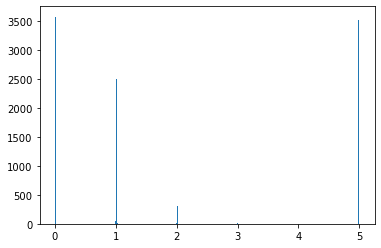

In [34]:

plt.hist(data,bins=300)
plt.show()

In [35]:
for i in range(len(sum_list)):
    sum_list[i]=np.round(sum_list[i]);
print(mi, ma)
print("NN:           ",sum(sum_list)/len(sum_list))

[0.0002] [5.]
NN:            [2.0809]


In [36]:
print("cost-sharing: ",total_delay_cost/test_number_cost);

cost-sharing:  3.2834


In [37]:
print("dp:           ",dp[nn][0][divide_number]);

dp:            1.8903822995975958


In [38]:
print(sum(list_payment)/len(list_payment))

[0.6486]


#### 

##### 